# Факторный анализ

*Использованы материалы [курса](https://compscicenter.ru/courses/data-mining-python2/)*

Суть: вместо разных переменных, описывающих наши данные, получить меньшее количество факторов (несуществующих факторов! факторы = представители наших данных)

Интересное: эти факторы отсутствуют в исходных данных, но порой можно найти новое и удивительное

Глобальные задачи (не только наши):

1. Сокращение числа переменных (рекомендательные системы - второе дыхание факторного анализа)
2. Измерение неизмеримого (!)
3. Проецирование данных
4. Выявление групп взаимосвязанныых переменных (помогает лучше понять связи между данными, даже если корреляции (линейные зависимости между данными) слабые
5. Преодоление мультиколинеарности в регрессионном анализе (когда нужно оставить только один - самый коррелирующий показатель, а совместно коррелирующие убрать)

*Бытовой пример факторного анализа: размер одежды*

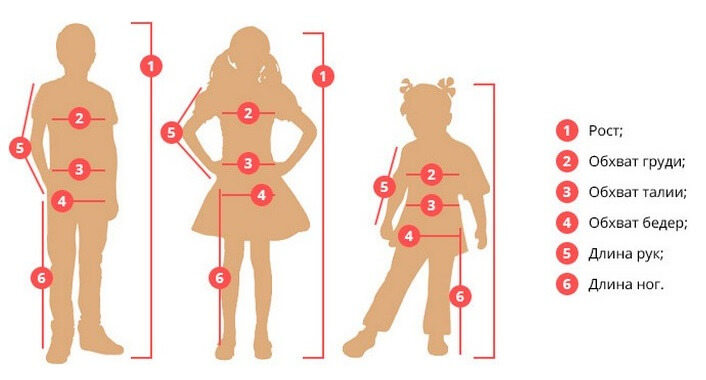

*Еще один пример*

![paremetri.jpg](https://d33wubrfki0l68.cloudfront.net/7a7645db2b38b336ead86c1485f36fab82871c0a/00027/static/uploads/factor-analysis.webp)

## Измерение неизмеримого?
- измерить силу любви
- измерить отношение пациентов к доктору
- удовлетворенность сортом кофе
- приверженность к курению
- лояльность торговой марке
- вероятность разорения фирмы...

### Но! Есть и критика факторного анализа

- наша модель никогда не будет единственной
- злоупотребление интерпретацией :)

# Шаги в процессе:

- построить матрицу корреляций
- стандартизировать данные
- выделить факторы
- проверть факторные остатки (их дисперсии)

In [2]:
# все импорты разом
!pip install factor-analyzer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 450.6 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=990d10b55501dfe24eab5515bd55d67b1bb746118d69003c2432f91e42068f72
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor-analyzer


Стандартизация: из каждого наблюдения каждого признака вычитается среднее арифметическое и результат делится на стандартное отклонение этого признака

в основе - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# Другой пример, более гуманитарный



Повторите на новом датасете

О данных: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/swiss.html

In [21]:
df2 = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Other/main/Swiss%20Fertility.csv', sep=';', decimal=',')
df2

,Unnamed: 0,Fertility,Agriculture,Examination,Education,Catholic,Infant_Mortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6
5,Porrentruy,76.1,35.3,9,7,90.57,26.6
6,Broye,83.8,70.2,16,7,92.85,23.6
7,Glane,92.4,67.8,14,8,97.16,24.9
8,Gruyere,82.4,53.3,12,7,97.67,21.0
9,Sarine,82.9,45.2,16,13,91.38,24.4


In [25]:
df2 = df2[['Fertility',	'Agriculture',	'Examination',	'Education',	'Catholic', 'Infant_Mortality']]
df2

,Fertility,Agriculture,Examination,Education,Catholic,Infant_Mortality
0,80.2,17.0,15,12,9.96,22.2
1,83.1,45.1,6,9,84.84,22.2
2,92.5,39.7,5,5,93.40,20.2
3,85.8,36.5,12,7,33.77,20.3
4,76.9,43.5,17,15,5.16,20.6
5,76.1,35.3,9,7,90.57,26.6
6,83.8,70.2,16,7,92.85,23.6
7,92.4,67.8,14,8,97.16,24.9
8,82.4,53.3,12,7,97.67,21.0
9,82.9,45.2,16,13,91.38,24.4


In [26]:
fa = FactorAnalyzer(rotation='varimax') # вращение
fa.fit(df2)
ev, v = fa.get_eigenvalues() # собственные векторы - сложно, математика))

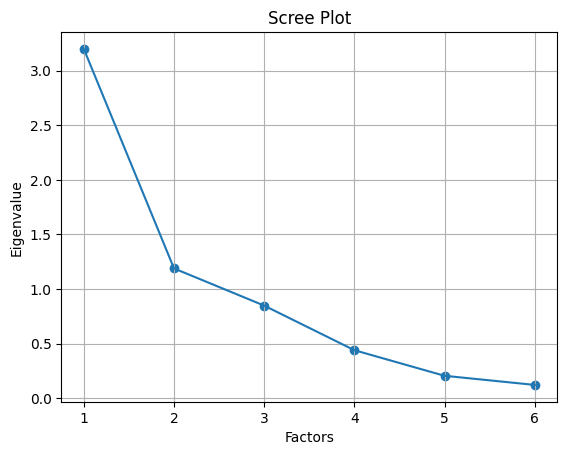

In [27]:
# график каменистой осыпи / график "локтя" - ищем изгиб
plt.scatter(range(1,df2.shape[1]+1),ev)
plt.plot(range(1,df2.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# больше 1 - хорошие факторы, меньше 1 - лишние; собтвенные вектора
# фактор со значением 1 вносит достаточный вклад

Берем 2 фактора
---

In [29]:
df2.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant_Mortality
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496
Infant_Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000


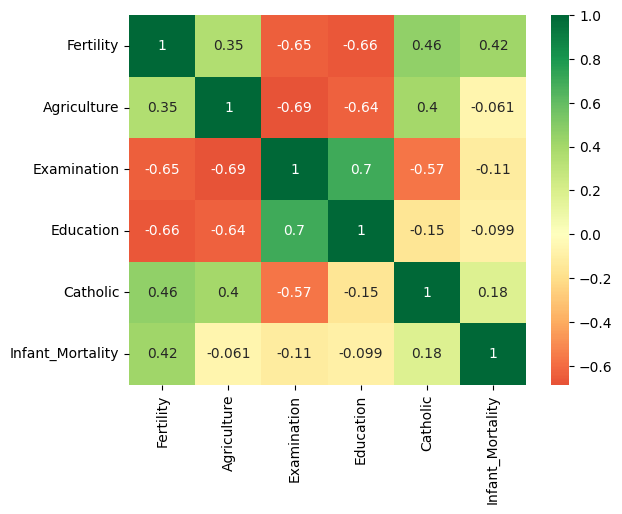

In [31]:
sns.heatmap(df2.corr(), annot=True, center=0, cmap='RdYlGn');

In [35]:
# функция для стандартизации
def scale_features(df):
    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    return scaled

In [36]:
df_scaled = preprocessing.scale(df2)
df_scaled

array([[ 8.13834902e-01, -1.49809105e+00, -1.88704610e-01,
         1.07360791e-01, -7.55810460e-01,  7.83415710e-01],
       [ 1.04849895e+00, -2.47440703e-01, -1.32901961e+00,
        -2.08011533e-01,  1.05907526e+00,  7.83415710e-01],
       [ 1.80913415e+00, -4.87779205e-01, -1.45572128e+00,
        -6.28507965e-01,  1.26654617e+00,  8.93433561e-02],
       [ 1.26697928e+00, -6.30202021e-01, -5.68809611e-01,
        -4.18259749e-01, -1.78721399e-01,  1.24046974e-01],
       [ 5.46803395e-01, -3.18652111e-01,  6.46987235e-02,
         4.22733115e-01, -8.72149288e-01,  2.28157827e-01],
       [ 4.82068484e-01, -6.83610577e-01, -9.48914612e-01,
        -4.18259749e-01,  1.19795473e+00,  2.31037489e+00],
       [ 1.10514200e+00,  8.69688258e-01, -6.20029434e-02,
        -4.18259749e-01,  1.25321567e+00,  1.26926636e+00],
       [ 1.80104229e+00,  7.62871146e-01, -3.15406277e-01,
        -3.13135641e-01,  1.35767825e+00,  1.72041339e+00],
       [ 9.91855906e-01,  1.17517762e-01, -5.688

In [38]:
fa = FactorAnalysis(n_components=2)
fa.fit(df_scaled)

pd.DataFrame(fa.components_, columns=df2.columns)

,Fertility,Agriculture,Examination,Education,Catholic,Infant_Mortality
0,-0.937748,-0.562404,0.786850,0.766248,-0.516523,-0.338293
1,0.245096,-0.701821,0.362441,0.271108,-0.119260,0.386190


In [39]:
pd.Series(fa.noise_variance_, df2.columns)
# дисперсия шума (чем больше это число, тем хуже объясняется факторами)

Fertility           0.061741
Agriculture         0.191887
Examination         0.248986
Education           0.339383
Catholic            0.718931
Infant_Mortality    0.735943
dtype: float64

In [40]:
scores = pd.DataFrame(fa.transform(df_scaled), columns=['factor1', 'factor2'])
scores
# что получили, как можно интерпретировать?

,factor1,factor2
0,-0.376304,1.644888
1,-0.970231,0.581488
2,-1.526207,1.122597
3,-0.927541,1.138150
4,-0.263031,0.732305
5,-0.516955,0.674158
6,-1.014975,0.225203
7,-1.528158,0.785954
8,-0.892282,0.419652
9,-0.751999,1.030792


[,1]	Fertility	‘common standardized fertility measure’

[,2]	Agriculture	% of males involved in agriculture as occupation

[,3]	Examination	% draftees receiving highest mark on army examination

[,4]	Education	% education beyond primary school for draftees.

[,5]	Catholic	% ‘catholic’ (as opposed to ‘protestant’).

[,6]	Infant.Mortality	live births who live less than 1 year.

----





1 фактор: Социально-экономическое развитие
---
Можно предположить, что **первый** фактор говорит нам о том, что регионы с высокими значениями по этому фактору имеют:
---

- Низкую рождаемость;
- Низкий уровень занятости в сельском хозяйстве;
- Высокий уровень образования;
- Высокие результаты на армейских экзаменах

Имеем отрицательную корреляцию с показателями рождаемости и занятости в сельском хозяйстве.
положительную корреляцию с уровнем образования и результатами на армейских экзаменах.

То есть это можно интерпретировать как показатель социально-экономического развития. Он отражает уровень современности региона, его образованность и низкую зависимость от сельского хозяйства. Такие регионы более развиты экономически и социально.



2 фактор: Традиционные сельские характеристики
---
Примечательно, что **второй** фактор характеризуется следующими признаками:

- Отрицательная корреляция с занятостью в сельском хозяйстве
- Положительная корреляция с уровнем младенческой смертности

Это означает, что регионы с высокими значениями по этому фактору имеют высокий уровень занятости в сельском хозяйстве, а также высокий уровень младенческой смертности.

То есть, фактор 2 отражает высокий уровень зависимости региона от сельского хозяйства и более высокие показатели младенческой смертности. Такие регионы менее развиты экономически и социально, больше соответствуют традиционному сельскому укладу.
